# French Cities Electricity Consumption Analysis and Visualization

---

### Introduction to Big Data Final Project

- **Professor:** Pietro MARINI 
- **E-mail:** pietro.marini.11001069@intervenants.groupe-efrei.fr 


### Student Groupe 15 

- **Name:** CAI Yutong 
- **Student ID:** 20140589 
- **E-mail:** yutong.cai@efrei.net 


- **Name:** WANG Shimeng 
- **Student ID:** 20140607 
- **E-mail:** shimeng.wang@efrei.net 

---

### Additional data source

Our data visualization step requires the use of geographical coordinates of 13 regions in France (in this case we only use 12 geographic coordinates), I already got this data through GOOGLE Earth and stored them in variables. The following are the 12 sets of geographical coordinate parameters that we need: 

- **Auvergne-Rhône-Alpes** : (45.430237,4.447065) 
- **Centre-Val de Loire** : (47.453113,1.694587) 
- **Bourgogne-Franche-Comté** : (47.134515,4.757569) 
- **Occitanie** : (43.628172,2.114897) 
- **Grand-Est** : (48.713219,5.632474) 
- **Île-de-France** : (48.706629,2.532708) 
- **Pays de la Loire** : (47.445244,-0.904242) 
- **Bretagne** : (48.164615,-2.798657) 
- **Nouvelle Aquitaine** : (45.218539,0.375118) 
- **Provence-Alpes-Côte d'Azur** : (43.954112,6.166464) 
- **Normandie** : (48.958520,0.132458) 
- **Hauts-de-France** : (49.950632,2.806351) 

### Additional Python module

In order to visualize the data on the map, we use the basemap 1.1.0 package. If you do not have this package in your Anaconda, you can install it by the following method:

You can install basemap 1.1.0 package with conda run: 
- `conda install -c conda-forge basemap`

The above command line comes from Anaconda: 
- [https://anaconda.org/conda-forge/basemap](https://anaconda.org/conda-forge/basemap)

### Our exploration direction

Our purpose is to explore the electricity usage of 12 major regions of France from 2011 to 2016 in the dataset, and visualize the data we have obtained. 
-  Each type of electricity usage from 2011 to 2016 in a certain region.
-  Each type of electricity usage in each region in a certain year.

---

## Part 0

Step 1: Import the necessary packages, please confirm that you have installed them, at the beginning
，we provide the basemap package installation method.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Step 2: Read CSV file, please change the path to the location of your CSV file.

In [2]:
conso = pd.read_csv("./consommation-electrique-par-secteur-dactivite-commune.csv", delimiter=";")

## Part 1

In this part, we will analyze each type of electricity usage from 2011 to 2016 in a certain region, and we will make data visualization work, the data will be intuitively displayed on the histogram, and is equipped with a clear line chart to help explain the electricity usage change from 2011 to 2016.

Select useful data from the original function and load it into the dataframe.

In [3]:
def GetConsoRegionDataframe(InputStringRegionName):
    conso_region_res = conso.groupby(['Nom région','Année'])['Conso totale Résidentiel (MWh)'].sum()[InputStringRegionName]
    conso_region_pro = conso.groupby(['Nom région','Année'])['Conso totale Professionnel (MWh)'].sum()[InputStringRegionName]
    conso_region_agr = conso.groupby(['Nom région','Année'])['Conso totale Agriculture (MWh)'].sum()[InputStringRegionName]
    conso_region_ind = conso.groupby(['Nom région','Année'])['Conso totale Industrie (MWh)'].sum()[InputStringRegionName]
    conso_region_ter = conso.groupby(['Nom région','Année'])['Conso totale Tertiaire (MWh)'].sum()[InputStringRegionName]
    conso_region_sec = conso.groupby(['Nom région','Année'])['Conso totale Secteur non affecté (MWh)'].sum()[InputStringRegionName]
    conso_region = pd.DataFrame([conso_region_res, conso_region_pro, conso_region_agr, conso_region_ind, conso_region_ter, conso_region_sec])
    conso_region.loc['Conso totale Complet (MWh)'] = conso_region.apply(lambda x: x.sum())
    #conso_region['Region'] = InputStringRegionName
    return conso_region

Transpose the dataframe obtained earlier.

In [4]:
def ConsoRegionDataframeTranspose(InputDataframeConsoRegion):    
    conso_region_t = pd.DataFrame([InputDataframeConsoRegion[2011], 
                                   InputDataframeConsoRegion[2012], 
                                   InputDataframeConsoRegion[2013], 
                                   InputDataframeConsoRegion[2014], 
                                   InputDataframeConsoRegion[2015], 
                                   InputDataframeConsoRegion[2016]])
    return conso_region_t

Data visualization work.

In [5]:
def ConsoRegionDataVisualization(InputStringRegionName, InputDataframeConsoRegion, InputDataframeConsoRegionT):
    
    plt.figure(42)
    plt.figure(figsize=(10,20)) #调节图形大小 #Adjust the size of the graphics

    plt.subplot(421)
    plt.title("Electricity consumption in 2011")
    sizes = InputDataframeConsoRegion[2011][0:6] #每块值 #Set the value of each sector
    explode = (0,0,0,0,0,0) #将某一块分割出来，值越大分割出的间隙越大 #Segmented sector
    labels = ['Res','Pro','Agr','Ind','Ter','Sec'] #定义标签 #Define labels
    colors = ['orangered','darkorange','gold','limegreen','cornflowerblue','mediumpurple',] #每块颜色定义 #Define sector color
    plt.pie(sizes,
            explode=explode,
            labels=labels,
            colors=colors,
            labeldistance = 1.2,#图例距圆心半径倍距离 #The distance from center of circle of lable
            autopct = '%3.2f%%', #数值保留固定小数位 #Numeric retains fixed decimal places
            shadow = False, #无阴影设置 #No shadow settings
            startangle =90, #逆时针起始角度设置 #Counterclockwise start angle setting
            pctdistance = 0.6) #数值距圆心半径倍数距离 #The distance from center of circle of number
    #plt.axis(aspect=0)
    plt.legend()

    plt.subplot(422)
    plt.title("Electricity consumption in 2012")
    sizes = InputDataframeConsoRegion[2012][0:6] #每块值 #Set the value of each sector
    explode = (0,0,0,0,0,0) #将某一块分割出来，值越大分割出的间隙越大 #Segmented sector
    labels = ['Res','Pro','Agr','Ind','Ter','Sec'] #定义标签 #Define labels
    colors = ['orangered','darkorange','gold','limegreen','cornflowerblue','mediumpurple',] #每块颜色定义 #Define sector color
    plt.pie(sizes,
            explode=explode,
            labels=labels,
            colors=colors,
            labeldistance = 1.2,#图例距圆心半径倍距离 #The distance from center of circle of lable
            autopct = '%3.2f%%', #数值保留固定小数位 #Numeric retains fixed decimal places
            shadow = False, #无阴影设置 #No shadow settings
            startangle =90, #逆时针起始角度设置 #Counterclockwise start angle setting
            pctdistance = 0.6) #数值距圆心半径倍数距离 #The distance from center of circle of number
    #plt.axis(aspect=0)
    plt.legend()


    plt.subplot(423)
    plt.title("Electricity consumption in 2013")
    sizes = InputDataframeConsoRegion[2013][0:6] #每块值 #Set the value of each sector
    explode = (0,0,0,0,0,0) #将某一块分割出来，值越大分割出的间隙越大 #Segmented sector
    labels = ['Res','Pro','Agr','Ind','Ter','Sec'] #定义标签 #Define labels
    colors = ['orangered','darkorange','gold','limegreen','cornflowerblue','mediumpurple',] #每块颜色定义 #Define sector color
    plt.pie(sizes,
            explode=explode,
            labels=labels,
            colors=colors,
            labeldistance = 1.2,#图例距圆心半径倍距离 #The distance from center of circle of lable
            autopct = '%3.2f%%', #数值保留固定小数位 #Numeric retains fixed decimal places
            shadow = False, #无阴影设置 #No shadow settings
            startangle =90, #逆时针起始角度设置 #Counterclockwise start angle setting
            pctdistance = 0.6) #数值距圆心半径倍数距离 #The distance from center of circle of number
    #plt.axis(aspect=0)
    plt.legend()


    plt.subplot(424)
    plt.title("Electricity consumption in 2014")
    sizes = InputDataframeConsoRegion[2014][0:6] #每块值 #Set the value of each sector
    explode = (0,0,0,0,0,0) #将某一块分割出来，值越大分割出的间隙越大 #Segmented sector
    labels = ['Res','Pro','Agr','Ind','Ter','Sec'] #定义标签 #Define labels
    colors = ['orangered','darkorange','gold','limegreen','cornflowerblue','mediumpurple',] #每块颜色定义 #Define sector color
    plt.pie(sizes,
            explode=explode,
            labels=labels,
            colors=colors,
            labeldistance = 1.2,#图例距圆心半径倍距离 #The distance from center of circle of lable
            autopct = '%3.2f%%', #数值保留固定小数位 #Numeric retains fixed decimal places
            shadow = False, #无阴影设置 #No shadow settings
            startangle =90, #逆时针起始角度设置 #Counterclockwise start angle setting
            pctdistance = 0.6) #数值距圆心半径倍数距离 #The distance from center of circle of number
    #plt.axis(aspect=0)
    plt.legend()


    plt.subplot(425)
    plt.title("Electricity consumption in 2015")
    sizes = InputDataframeConsoRegion[2015][0:6] #每块值 #Set the value of each sector
    explode = (0,0,0,0,0,0) #将某一块分割出来，值越大分割出的间隙越大 #Segmented sector
    labels = ['Res','Pro','Agr','Ind','Ter','Sec'] #定义标签 #Define labels
    colors = ['orangered','darkorange','gold','limegreen','cornflowerblue','mediumpurple',] #每块颜色定义 #Define sector color
    plt.pie(sizes,
            explode=explode,
            labels=labels,
            colors=colors,
            labeldistance = 1.2,#图例距圆心半径倍距离 #The distance from center of circle of lable
            autopct = '%3.2f%%', #数值保留固定小数位 #Numeric retains fixed decimal places
            shadow = False, #无阴影设置 #No shadow settings
            startangle =90, #逆时针起始角度设置 #Counterclockwise start angle setting
            pctdistance = 0.6) #数值距圆心半径倍数距离 #The distance from center of circle of number
    #plt.axis(aspect=0)
    plt.legend()


    plt.subplot(426)
    plt.title("Electricity consumption in 2016")
    sizes = InputDataframeConsoRegion[2016][0:6] #每块值 #Set the value of each sector
    explode = (0,0,0,0,0,0) #将某一块分割出来，值越大分割出的间隙越大 #Segmented sector
    labels = ['Res','Pro','Agr','Ind','Ter','Sec'] #定义标签 #Define labels
    colors = ['orangered','darkorange','gold','limegreen','cornflowerblue','mediumpurple',] #每块颜色定义 #Define sector color
    plt.pie(sizes,
            explode=explode,
            labels=labels,
            colors=colors,
            labeldistance = 1.2,#图例距圆心半径倍距离 #The distance from center of circle of lable
            autopct = '%3.2f%%', #数值保留固定小数位 #Numeric retains fixed decimal places
            shadow = False, #无阴影设置 #No shadow settings
            startangle =90, #逆时针起始角度设置 #Counterclockwise start angle setting
            pctdistance = 0.6) #数值距圆心半径倍数距离 #The distance from center of circle of number
    #plt.axis(aspect=0)
    plt.legend()

    plt.subplot(414)
    plt.title(InputStringRegionName + " electricity consumption changes from 2011 to 2016")
    plt.plot(InputDataframeConsoRegionT['Conso totale Résidentiel (MWh)'], c='orangered', marker='o', label='Conso totale Résidentiel (MWh)')
    plt.plot(InputDataframeConsoRegionT['Conso totale Professionnel (MWh)'], c='darkorange', marker='o', label='Conso totale Professionnel (MWh)')
    plt.plot(InputDataframeConsoRegionT['Conso totale Agriculture (MWh)'], c='gold', marker='o', label='Conso totale Agriculture (MWh)')
    plt.plot(InputDataframeConsoRegionT['Conso totale Industrie (MWh)'], c='limegreen', marker='o', label='Conso totale Industrie (MWh)')
    plt.plot(InputDataframeConsoRegionT['Conso totale Tertiaire (MWh)'], c='cornflowerblue', marker='o', label='Conso totale Tertiaire (MWh)')
    plt.plot(InputDataframeConsoRegionT['Conso totale Secteur non affecté (MWh)'], c='mediumpurple', marker='o', label='Conso totale Secteur non affecté (MWh)')
    plt.legend()

    plt.suptitle("Electricity usage analysis for "+ InputStringRegionName +"\n(2011 - 2016)",fontsize=20,x=0.52,y=1.05,)
    plt.tight_layout()
    plt.show()

### Function encapsulation

In [6]:
def PrintConsoTable(InputStringRegionName):
    conso_region = GetConsoRegionDataframe(InputStringRegionName)
    print("Electricity usage table of " + InputStringRegionName)
    return conso_region

In [7]:
def PrintConsoTableTranspose(InputStringRegionName):
    conso_region = GetConsoRegionDataframe (InputStringRegionName)
    conso_region_t = ConsoRegionDataframeTranspose(conso_region)
    print("Electricity usage table transpose of" + InputStringRegionName)
    return conso_region_t

In [8]:
def PrintConsoAnalysis(InputStringRegionName):
    conso_region = GetConsoRegionDataframe(InputStringRegionName)
    conso_region_t = ConsoRegionDataframeTranspose(conso_region)
    ConsoRegionDataVisualization(InputStringRegionName, conso_region, conso_region_t)

### Important Hint

The function has been encapsulated, and you can use the following variables in the top three functions, which greatly facilitates the process of your operation:
- "Auvergne-Rhône-Alpes"
- "Centre-Val de Loire"
- "Bourgogne-Franche-Comté"
- "Occitanie"
- "Grand-Est"
- "Île-de-France"
- "Pays de la Loire"
- "Bretagne"
- "Nouvelle Aquitaine"
- "Provence-Alpes-Côte d'Azur"
- "Normandie"
- "Hauts-de-France"

You can use the variables provided above in these functions:
- PrintConsoTable(`InputStringRegionName`)
- PrintConsoTableTranspose(`InputStringRegionName`)
- PrintConsoAnalysis(`InputStringRegionName`)

*When the data visualization error occurs, rerun the display function.

In [9]:
PrintConsoTable("Île-de-France")

Electricity usage table of Île-de-France


Année,2011,2012,2013,2014,2015,2016
Conso totale Résidentiel (MWh),1.824309e+07,1.876574e+07,1.816298e+07,1.532216e+07,1.481614e+07,1.186819e+07
Conso totale Professionnel (MWh),6.319255e+06,6.301389e+06,6.056665e+06,5.344491e+06,5.025373e+06,3.870140e+06
Conso totale Agriculture (MWh),6.910112e+04,6.004325e+04,6.123812e+04,5.844575e+04,7.250583e+04,5.984821e+04
Conso totale Industrie (MWh),4.605897e+06,4.716733e+06,4.867013e+06,4.605940e+06,4.653214e+06,4.705970e+06
Conso totale Tertiaire (MWh),2.432654e+07,2.538176e+07,2.603100e+07,2.465709e+07,2.508733e+07,2.520920e+07
Conso totale Secteur non affecté (MWh),2.076565e+05,1.238071e+05,2.128620e+05,1.028605e+05,1.367492e+05,1.214736e+05
Conso totale Complet (MWh),5.377154e+07,5.534947e+07,5.539177e+07,5.009099e+07,4.979132e+07,4.583482e+07


In [10]:
PrintConsoTableTranspose("Île-de-France")

Electricity usage table transpose ofÎle-de-France


,Conso totale Résidentiel (MWh),Conso totale Professionnel (MWh),Conso totale Agriculture (MWh),Conso totale Industrie (MWh),Conso totale Tertiaire (MWh),Conso totale Secteur non affecté (MWh),Conso totale Complet (MWh)
2011,1.824309e+07,6.319255e+06,69101.123020,4.605897e+06,2.432654e+07,207656.473078,5.377154e+07
2012,1.876574e+07,6.301389e+06,60043.249759,4.716733e+06,2.538176e+07,123807.118785,5.534947e+07
2013,1.816298e+07,6.056665e+06,61238.124345,4.867013e+06,2.603100e+07,212861.976292,5.539177e+07
2014,1.532216e+07,5.344491e+06,58445.748535,4.605940e+06,2.465709e+07,102860.547733,5.009099e+07
2015,1.481614e+07,5.025373e+06,72505.825434,4.653214e+06,2.508733e+07,136749.215101,4.979132e+07
2016,1.186819e+07,3.870140e+06,59848.206562,4.705970e+06,2.520920e+07,121473.602487,4.583482e+07


<Figure size 432x288 with 0 Axes>

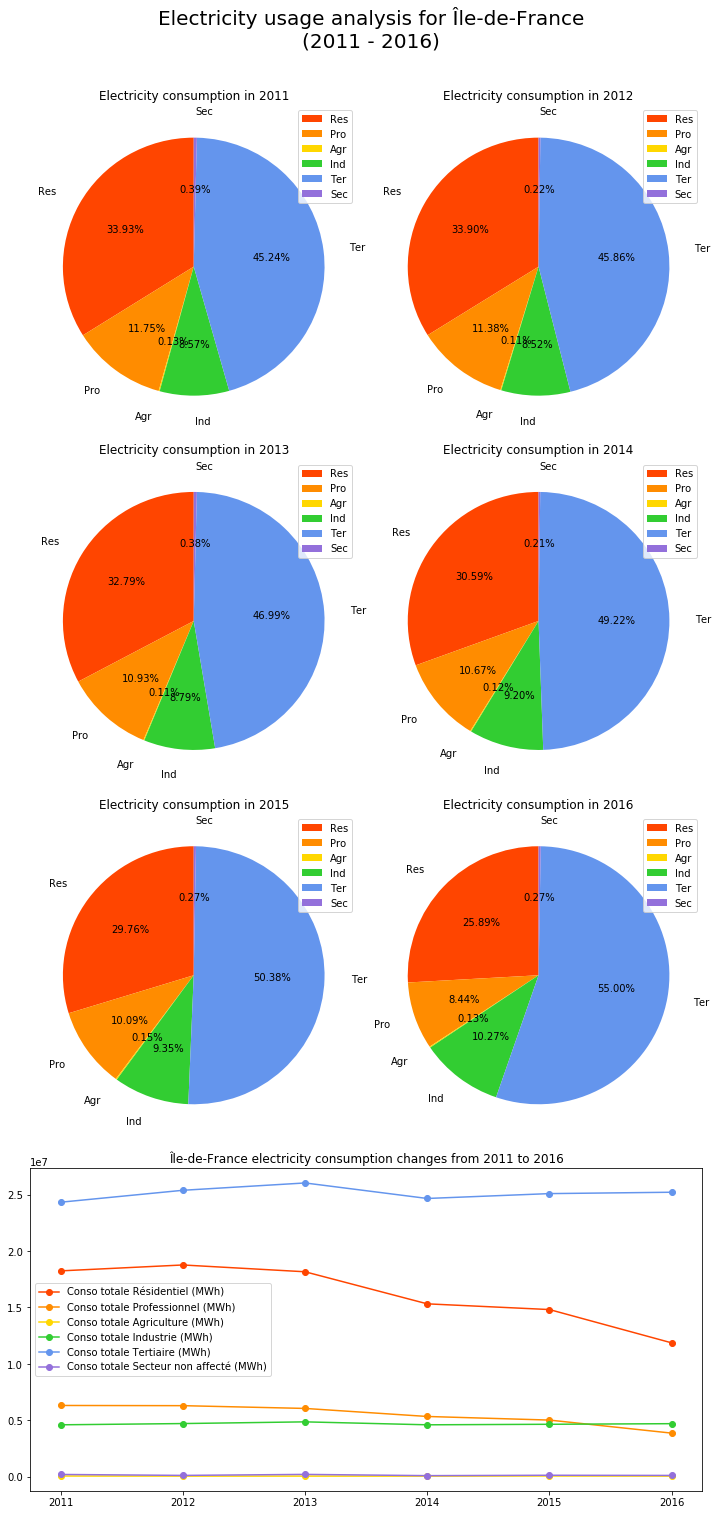

In [11]:
PrintConsoAnalysis("Île-de-France")

---

## Part 2

In this part, we will analyze each type of electricity usage in each region in a certain year, and we will make data visualization work, the data will be intuitively displayed on the map of France, and is equipped with a clear histogram to help explain.

Select useful data from the original function and load it into the dataframe.

In [12]:
def GetConsoTotalDataframe(InputIntegerYear):
    conso_auv = GetConsoRegionDataframe("Auvergne-Rhône-Alpes")
    conso_cen = GetConsoRegionDataframe("Centre-Val de Loire")
    conso_bou = GetConsoRegionDataframe("Bourgogne-Franche-Comté")
    conso_occ = GetConsoRegionDataframe("Occitanie")
    conso_gra = GetConsoRegionDataframe("Grand-Est")
    conso_ile = GetConsoRegionDataframe("Île-de-France")
    conso_pay = GetConsoRegionDataframe("Pays de la Loire")
    conso_bre = GetConsoRegionDataframe("Bretagne")
    conso_nou = GetConsoRegionDataframe("Nouvelle Aquitaine")
    conso_pro = GetConsoRegionDataframe("Provence-Alpes-Côte d'Azur")
    conso_nor = GetConsoRegionDataframe("Normandie")
    conso_hau = GetConsoRegionDataframe("Hauts-de-France")

    series_auv = conso_auv[InputIntegerYear]
    series_cen = conso_cen[InputIntegerYear]
    series_bou = conso_bou[InputIntegerYear]
    series_occ = conso_occ[InputIntegerYear]
    series_gra = conso_gra[InputIntegerYear]
    series_ile = conso_ile[InputIntegerYear]
    series_pay = conso_pay[InputIntegerYear]
    series_bre = conso_bre[InputIntegerYear]
    series_nou = conso_nou[InputIntegerYear]
    series_pro = conso_pro[InputIntegerYear]
    series_nor = conso_nor[InputIntegerYear]
    series_hau = conso_hau[InputIntegerYear]

    conso_total_year = pd.DataFrame([series_auv,series_cen,series_bou,series_occ,
                                     series_gra,series_ile,series_pay,series_bre,
                                     series_nou,series_pro,series_nor,series_hau],
                                    index=['Auvergne-Rhône-Alpes', 'Centre-Val de Loire',
                                           'Bourgogne-Franche-Comté', 'Occitanie', 
                                           'Grand-Est','Île-de-France', 
                                           'Pays de la Loire', 'Bretagne',
                                           'Nouvelle Aquitaine', "Provence-Alpes-Côte d'Azur", 
                                           'Normandie','Hauts-de-France'])

    return conso_total_year

Data visualization work.

In [13]:
def ConsoTotalDataVisualization(InputIntegerYear, InputStringColumn, InputDataframeConsoTotal):
    plt.figure(12)
    plt.figure(figsize=(12,6))
    
    plt.subplot(121)
    REGIONS = list(InputDataframeConsoTotal.index)
    TOTALES = list(InputDataframeConsoTotal[InputStringColumn])
    LATITUDES = [45.430237, 47.453113, 47.134515, 43.628172, 
                 48.713219, 48.706629, 47.445244, 48.164615, 
                 45.218539, 43.954112, 48.958520, 49.950632]
    LONGITUDES = [4.447065, 1.694587, 4.757569, 2.114897, 
                  5.632474, 2.532708, -0.904242, -2.798657, 
                  0.375118, 6.166464, 0.132458, 2.806351]

    # setup mercator map projection.
    MY_MAP = Basemap(width=1300000, height=1300000, projection='lcc', resolution='c', lat_0=47, lon_0=2)
    MY_MAP.drawcoastlines() #地图绘制海岸线 #Add coastline
    MY_MAP.drawcountries() #地图绘制国境线 #Add borders
    MY_MAP.bluemarble() #地图显示地表颜色 #Add surface color
    MY_MAP.drawparallels(np.arange(40, 60, 5), labels=[1, 0, 0, 0]) #地图显示纬度线 #Set and display latitude lines
    MY_MAP.drawmeridians(np.arange(-5, 15, 5), labels=[0, 0, 0, 1]) #地图显示经度线 #Set and display longitude line

    # Convert geographic coordinates to graphical coordinates
    X_COORD, Y_COORD = MY_MAP(LONGITUDES, LATITUDES)
    # Get a color map
    CMAP = plt.cm.get_cmap('Oranges')
    # Set the size of the individual scatter points when plotting a scatter plot
    MIN_TOTALE = min(TOTALES)
    #SIZE = (np.array(TOTALES)-MIN_TOTALE+30000)/(max(TOTALES)/3000) #绘制散点图时个体散点的大小值
    SIZE = (np.array(TOTALES))/(max(TOTALES)/1000) #绘制散点图时个体散点的大小值

    # Set the scatter plot of electricity usage
    SCA = MY_MAP.scatter(X_COORD, Y_COORD, s=SIZE, marker='o', c=TOTALES, cmap=CMAP)
    plt.title("Data map of" + InputStringColumn) #显示绘制的图表名称 #Display the chart name
    plt.colorbar(SCA) #绘制比色卡 #Draw a color card
    
    num_list = list(InputDataframeConsoTotal[InputStringColumn])
    
    name_list = ['Auvergne-Rhône-Alpes', 'Centre-Val de Loire',
                 'Bourgogne-Franche-Comté', 'Occitanie', 
                 'Grand-Est', 'Île-de-France',
                 'Pays de la Loire', 'Bretagne', 
                 'Nouvelle Aquitaine',"Provence-Alpes-Côte d'Azur", 
                 'Normandie', 'Hauts-de-France'] 
    
    plt.subplot(122)
    plt.title("Histogram" + InputStringColumn)
    plt.bar(1,num_list[0] ,facecolor='orangered',edgecolor="grey",label = name_list[0])
    plt.bar(2,num_list[1] ,facecolor='darkorange',edgecolor="grey",label = name_list[1])  
    plt.bar(3,num_list[2] ,facecolor='gold',edgecolor="grey",label = name_list[2])  
    plt.bar(4,num_list[3] ,facecolor='limegreen',edgecolor="grey",label = name_list[3])  
    plt.bar(5,num_list[4] ,facecolor='cornflowerblue',edgecolor="grey",label = name_list[4])  
    plt.bar(6,num_list[5] ,facecolor='mediumpurple',edgecolor="grey",label = name_list[5])  
    plt.bar(7,num_list[6] ,facecolor='orangered',edgecolor="black",label = name_list[6])  
    plt.bar(8,num_list[7] ,facecolor='darkorange',edgecolor="black",label = name_list[7])  
    plt.bar(9,num_list[8] ,facecolor='gold',edgecolor="black",label = name_list[8])  
    plt.bar(10,num_list[9] ,facecolor='limegreen',edgecolor="black",label = name_list[9])  
    plt.bar(11,num_list[10] ,facecolor='cornflowerblue',edgecolor="black",label = name_list[10])  
    plt.bar(12,num_list[11] ,facecolor='mediumpurple',edgecolor="black",label = name_list[11]) 
    plt.legend()
    
    plt.suptitle("Electricity usage for " + InputStringColumn + " in " + str(InputIntegerYear) ,fontsize=20,x=0.50,y=1.05,)
    plt.tight_layout()
    plt.show() #显示绘制的plt图片 #Display plt picture already drawn

### Function encapsulation

In [14]:
def PrintConsoTotalTable(InputIntegerYear):
    conso_total_year = GetConsoTotalDataframe(InputIntegerYear)
    print("Electricity usage total table of " + str(InputIntegerYear))
    return conso_total_year

In [15]:
def PrintConsoTotalAnalysis(InputIntegerYear):
    conso_total_year = GetConsoTotalDataframe(InputIntegerYear)
    for column in conso_total_year.columns:
        ConsoTotalDataVisualization(InputIntegerYear, column, conso_total_year)

### Important Hint

The function has been encapsulated, and you can use the following variables in the top two functions, which greatly facilitates the process of your operation:
- 2011
- 2012
- 2013
- 2014
- 2015
- 2016

You can use the variables provided above in these functions:
- PrintConsoTotalTable(`InputIntegerYear`)
- PrintConsoTotalAnalysis(`InputIntegerYear`)

*When the data visualization error occurs, rerun the display function.

In [16]:
PrintConsoTotalTable(2013)

Electricity usage total table of 2013


,Conso totale Résidentiel (MWh),Conso totale Professionnel (MWh),Conso totale Agriculture (MWh),Conso totale Industrie (MWh),Conso totale Tertiaire (MWh),Conso totale Secteur non affecté (MWh),Conso totale Complet (MWh)
Auvergne-Rhône-Alpes,1.637804e+07,4.668411e+06,195535.248682,1.029483e+07,1.159290e+07,71167.223709,4.320088e+07
Centre-Val de Loire,6.371992e+06,1.449507e+06,340460.602193,2.971878e+06,3.324099e+06,54670.462132,1.451261e+07
Bourgogne-Franche-Comté,5.617240e+06,1.484539e+06,65625.296950,3.964082e+06,3.620465e+06,33719.016243,1.478567e+07
Occitanie,1.326882e+07,3.469953e+06,227729.748444,3.498539e+06,7.673434e+06,23512.060722,2.816199e+07
Grand-Est,8.027975e+06,2.125568e+06,134958.933494,6.492004e+06,4.915625e+06,58898.973269,2.175503e+07
Île-de-France,1.816298e+07,6.056665e+06,61238.124345,4.867013e+06,2.603100e+07,212861.976292,5.539177e+07
Pays de la Loire,9.252407e+06,2.371318e+06,394559.450556,5.002655e+06,4.859570e+06,6938.115496,2.188745e+07
Bretagne,8.240079e+06,2.357895e+06,657753.197432,4.043012e+06,4.295851e+06,9415.908707,1.960401e+07
Nouvelle Aquitaine,1.403438e+07,3.599009e+06,457435.085703,4.734433e+06,7.420703e+06,41668.482280,3.028763e+07
Provence-Alpes-Côte d'Azur,1.148600e+07,2.995659e+06,143344.489744,2.350022e+06,8.289531e+06,44691.048710,2.530925e+07


<Figure size 432x288 with 0 Axes>

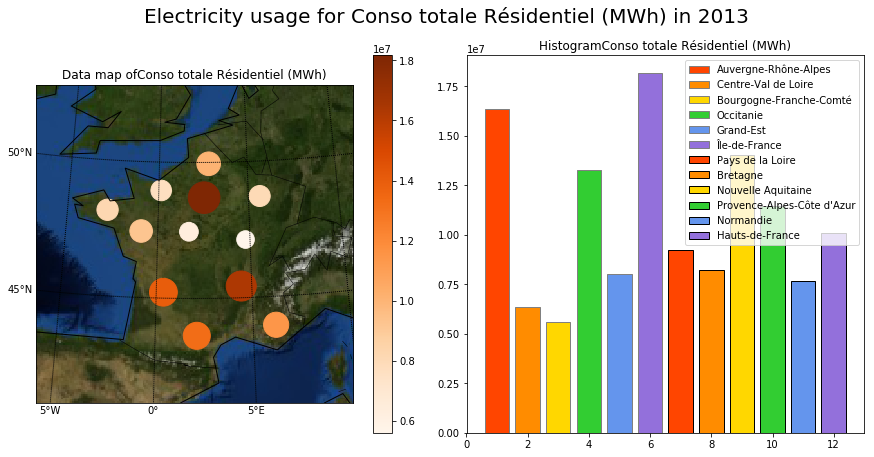

<Figure size 432x288 with 0 Axes>

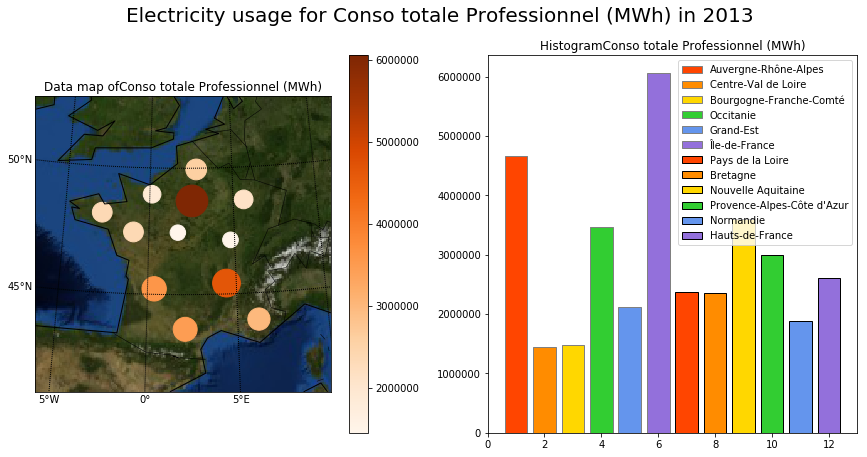

<Figure size 432x288 with 0 Axes>

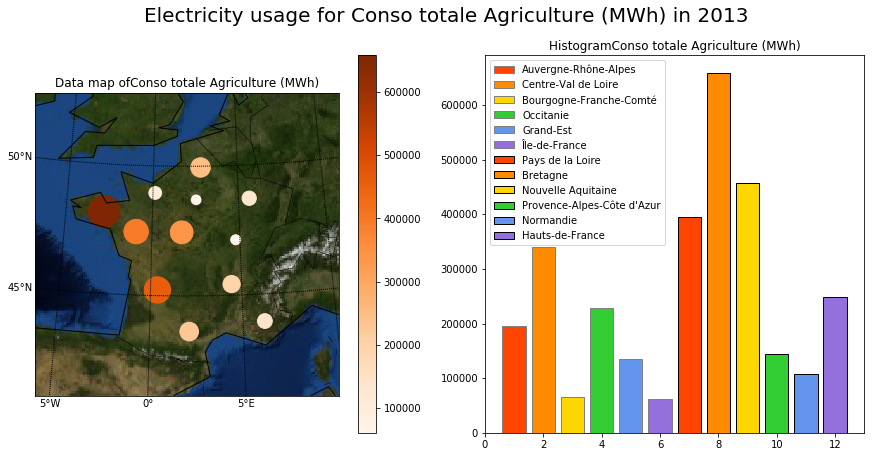

<Figure size 432x288 with 0 Axes>

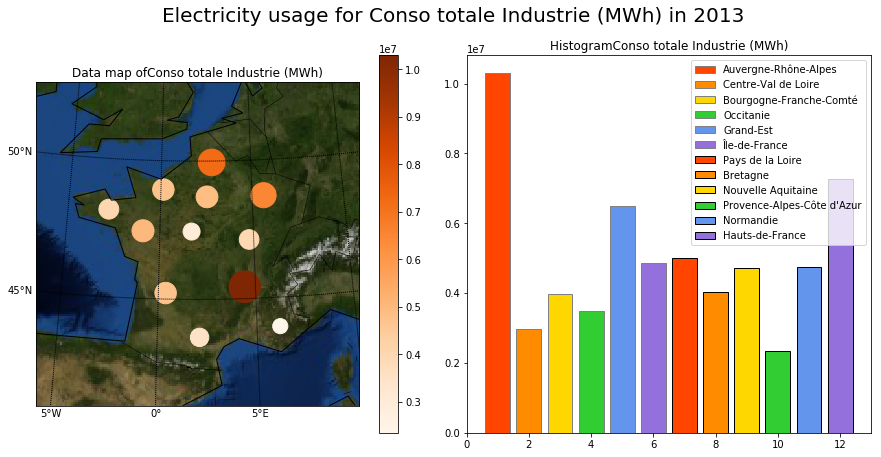

<Figure size 432x288 with 0 Axes>

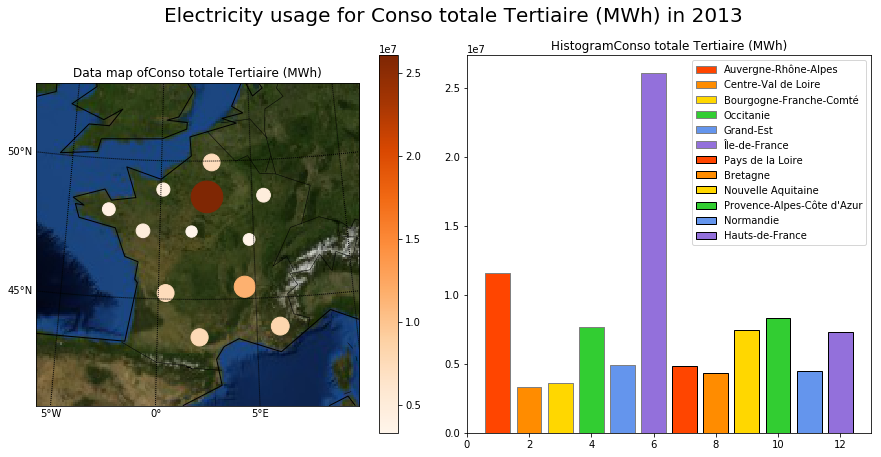

<Figure size 432x288 with 0 Axes>

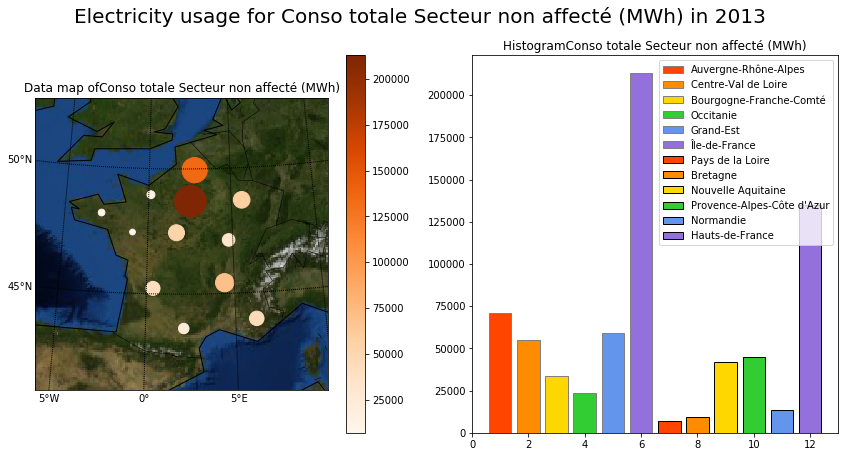

<Figure size 432x288 with 0 Axes>

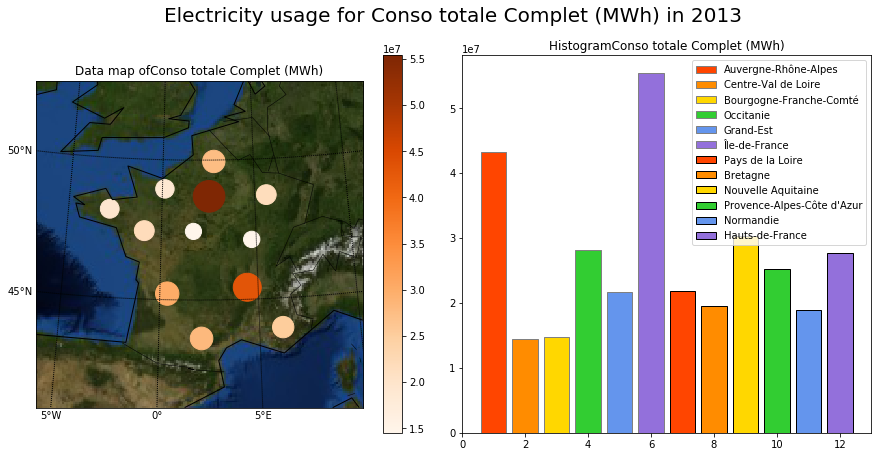

In [17]:
PrintConsoTotalAnalysis(2013)

---

# -END-